In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("/content/drive/MyDrive/MSIB Celerates Batch 7/Code Ipynb/25. Model Implementation (Classification)/Bank_Personal_Loan_Modelling.csv")
df.shape

(5000, 14)

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [5]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype(float)

In [12]:
df['Personal Loan'].value_counts()

,count
Personal Loan,
0,4520
1,480


In [6]:
y = df['Personal Loan']
X = df.drop(columns=['Personal Loan', 'ID'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [9]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8993333333333333
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1343
           1       0.54      0.25      0.34       157

    accuracy                           0.90      1500
   macro avg       0.73      0.61      0.64      1500
weighted avg       0.88      0.90      0.88      1500



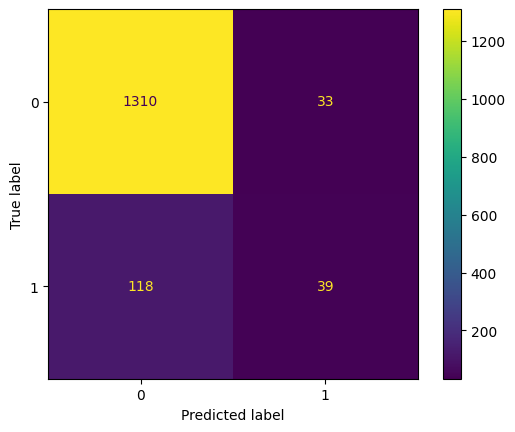

In [10]:
#confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.show()

In [11]:
# save model
with open('/content/drive/MyDrive/MSIB Celerates Batch 7/Code Ipynb/classification_knn.pkl','wb') as f:
    pickle.dump(knn,f)